In [12]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


import pickle

In [10]:
#open pickle /batch1/actual.pkl
with open('./batch1/actual.pkl', 'rb') as f:
    dgl_actual = pickle.load(f)

#open pickle /batch1/actual.pkl
with open('./batch1/predicted.pkl', 'rb') as f:
    dgl_predicted = pickle.load(f)

In [13]:
# read info.csv
info = pd.read_csv('./data/info.csv')


# for every element in the column 
for i in range(len(info)):
    # convert the string to a list of ints
    elem = [int(j) for j in info['labels'][i][1:-1].split(',')]
    # replace the string with the list of ints
    info['labels'][i] = elem

assert all([len(info['labels'][i]) == info['room_amount'][i] + info['window_amount'][i] for i in range(len(info))])


# Count occurrences of each label value in each row
labels_counts = info['labels'].apply(lambda x: pd.Series(x).value_counts()).fillna(0)

# Rename columns to include prefix
labels_counts.columns = ['label_count_' + str(c) for c in labels_counts.columns]

# Concatenate counts with original dataframe
info_encoded = pd.concat([info.drop('labels', axis=1), labels_counts], axis=1)

labels = ["window_xxs_n", "window_xxs_ne", "window_xxs_e", "window_xxs_se", "window_xxs_s", "window_xxs_sw", "window_xxs_w", "window_xxs_nw", "window_xs_n", "window_xs_ne", "window_xs_e", "window_xs_se", "window_xs_s", "window_xs_sw", "window_xs_w", "window_xs_nw", "window_s_n", "window_s_ne", "window_s_e", "window_s_se", "window_s_s", "window_s_sw", "window_s_w", "window_s_nw", "window_m_n", "window_m_ne", "window_m_e", "window_m_se", "window_m_s", "window_m_sw", "window_m_w", "window_m_nw", "window_l_n", "window_l_ne", "window_l_e", "window_l_se", "window_l_s", "window_l_sw", "window_l_w", "window_l_nw", "window_xl_n", "window_xl_ne", "window_xl_e", "window_xl_se", "window_xl_s", "window_xl_sw", "window_xl_w", "window_xl_nw", "window_xxl_n", "window_xxl_ne", "window_xxl_e", "window_xxl_se", "window_xxl_s", "window_xxl_sw", "window_xxl_w", "window_xxl_nw", "livingroom_xxs", "livingroom_xs", "livingroom_s", "livingroom_m", "livingroom_l", "livingroom_xl", "livingroom_xxl", "utility_xxs", "utility_xs", "utility_s", "utility_m", "utility_l", "utility_xl", "utility_xxl", "toilet_xxs", "toilet_xs", "toilet_s", "toilet_m", "toilet_l", "toilet_xl", "toilet_xxl", "bedroom_xxs", "bedroom_xs", "bedroom_s", "bedroom_m", "bedroom_l", "bedroom_xl", "bedroom_xxl", "bathroom_xxs", "bathroom_xs", "bathroom_s", "bathroom_m", "bathroom_l", "bathroom_xl", "bathroom_xxl"]


new_names = {
    f'label_count_{i}': label 
    for i, label in enumerate(labels)
}

info_encoded = info_encoded.rename(columns=new_names)

# Split the data into training and testing sets
test_set = info_encoded[:int(len(info_encoded)*0.2)]
train_set = info_encoded[int(len(info_encoded)*0.2):]

input_cols = ["window_xxs_n", "window_xxs_ne", "window_xxs_e", "window_xxs_se", "window_xxs_s", "window_xxs_sw", "window_xxs_w", "window_xxs_nw", "window_xs_n", "window_xs_ne", "window_xs_e", "window_xs_se", "window_xs_s", "window_xs_sw", "window_xs_w", "window_xs_nw", "window_s_n", "window_s_ne", "window_s_e", "window_s_se", "window_s_s", "window_s_sw", "window_s_w", "window_s_nw", "window_m_n", "window_m_ne", "window_m_e", "window_m_se", "window_m_s", "window_m_sw", "window_m_w", "window_m_nw", "window_l_n", "window_l_ne", "window_l_e", "window_l_se", "window_l_s", "window_l_sw", "window_l_w", "window_l_nw", "window_xl_n", "window_xl_ne", "window_xl_e", "window_xl_se", "window_xl_s", "window_xl_sw", "window_xl_w", "window_xl_nw", "window_xxl_n", "window_xxl_ne", "window_xxl_e", "window_xxl_se", "window_xxl_s", "window_xxl_sw", "window_xxl_w", "window_xxl_nw", "livingroom_xxs", "livingroom_xs", "livingroom_s", "livingroom_m", "livingroom_l", "livingroom_xl", "livingroom_xxl", "utility_xxs", "utility_xs", "utility_s", "utility_m", "utility_l", "utility_xl", "utility_xxl", "toilet_xxs", "toilet_xs", "toilet_s", "toilet_m", "toilet_l", "toilet_xl", "toilet_xxl", "bedroom_xxs", "bedroom_xs", "bedroom_s", "bedroom_m", "bedroom_l", "bedroom_xl", "bedroom_xxl", "bathroom_xxs", "bathroom_xs", "bathroom_s", "bathroom_m", "bathroom_l", "bathroom_xl", "bathroom_xxl"]
output_col = 'energy_class'


/tmp/ipykernel_715898/2287175217.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info['labels'][i] = elem


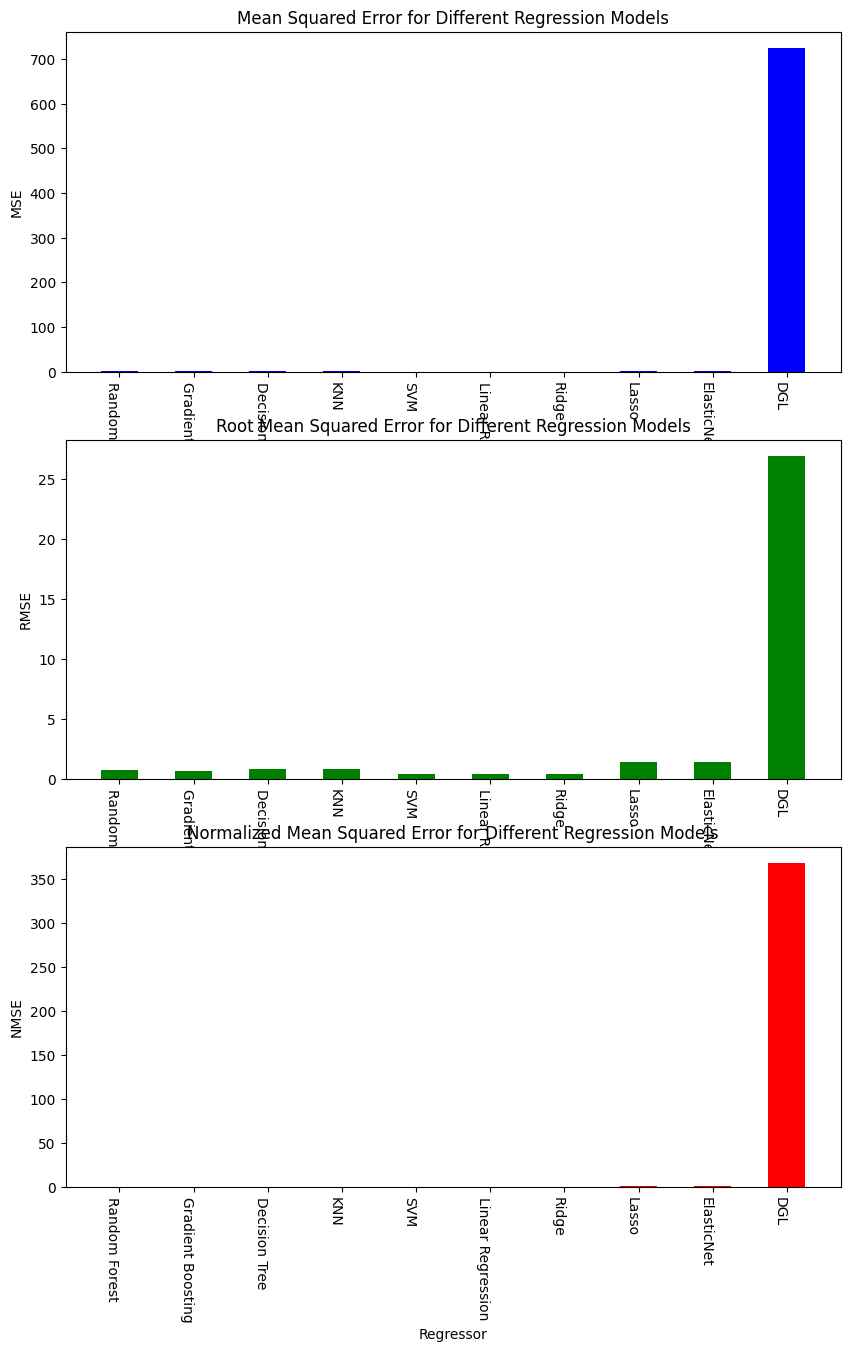

In [14]:
# Define the list of regressors to test
regressors = [    RandomForestRegressor(n_estimators=100, max_depth=10, random_state=0),    GradientBoostingRegressor(),    DecisionTreeRegressor(),    KNeighborsRegressor(),    SVR(),    LinearRegression(),    Ridge(),    Lasso(),    ElasticNet()]

# Initialize lists to store scores
mse_scores = []
rmse_scores = []
nmse_scores = []

# Loop over regressors
for regressor in regressors:
    # Train the regressor
    regressor.fit(train_set[input_cols], train_set[output_col])

    # Make predictions
    predictions = regressor.predict(test_set[input_cols])

    # Calculate MSE, RMSE, and NMSE
    mse = mean_squared_error(test_set[output_col], predictions)
    rmse = np.sqrt(mse)
    naive_pred = np.mean(train_set[output_col])
    naive_mse = np.mean((naive_pred - test_set[output_col])**2)
    nmse = mse / naive_mse

    # Add scores to lists
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    nmse_scores.append(nmse)

# DGLRegressor()
mse = mean_squared_error(dgl_actual, dgl_predicted)
rmse = np.sqrt(mse)
naive_pred = np.mean(train_set[output_col])
naive_mse = np.mean((naive_pred - test_set[output_col])**2)
nmse = mse / naive_mse

# Add scores to lists
mse_scores.append(mse)
rmse_scores.append(rmse)
nmse_scores.append(nmse)

# Plot bar charts of scores
fig, axs = plt.subplots(nrows=3, figsize=(10, 15))

x_labels = ['Random Forest', 'Gradient Boosting', 'Decision Tree', 'KNN', 'SVM', 'Linear Regression', 'Ridge', 'Lasso', 'ElasticNet', 'DGL']
x_pos = np.arange(len(x_labels))
bar_width = 0.5

axs[0].bar(x_pos, mse_scores, bar_width, color='blue')
axs[0].set_xticks(x_pos)
axs[0].set_xticklabels(x_labels, rotation=-90, ha='right')
axs[0].set_xlabel('Regressor')
axs[0].set_ylabel('MSE')
axs[0].set_title('Mean Squared Error for Different Regression Models')

axs[1].bar(x_pos, rmse_scores, bar_width, color='green')
axs[1].set_xticks(x_pos)
axs[1].set_xticklabels(x_labels, rotation=-90, ha='right')
axs[1].set_xlabel('Regressor')
axs[1].set_ylabel('RMSE')
axs[1].set_title('Root Mean Squared Error for Different Regression Models')

axs[2].bar(x_pos, nmse_scores, bar_width, color='red')
axs[2].set_xticks(x_pos)
axs[2].set_xticklabels(x_labels, rotation=-90, ha='right')
axs[2].set_xlabel('Regressor')
axs[2].set_ylabel('NMSE')
axs[2].set_title('Normalized Mean Squared Error for Different Regression Models')

plt.show()

